### This notebook demonstrates reading video frames stored in Tensorflow `tfrecord` format.

### The video frames are the result of calculating optical flow between two adjacent RGB video frames.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2022-10-08 23:47:00.039843: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-08 23:47:00.683612: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-08 23:47:00.683700: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-08 23:47:00.834399: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-08 23:47:03.659873: W tensorflow/stream_executor/platform/de

In [2]:
tf_record_file = 'batch_1_of_2.tfrecords'

raw_video_dataset = tf.data.TFRecordDataset(tf_record_file)

2022-10-08 23:47:09.955651: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-08 23:47:09.955759: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-08 23:47:09.955831: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (debonair): /proc/driver/nvidia/version does not exist
2022-10-08 23:47:09.956757: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
height = 720
width = 1280
num_depth = 4
n_videos_per_record = 1

n_frames = 354

In [4]:
def _parse_video_function(example_proto):
    image_seq = []
    global n_frames

    #Use sample frames for demostration.
    sample_frames = 5

    for image_count in range(sample_frames):
        path = 'blob' + '/' + str(image_count)

        feature_dict = {path : tf.io.FixedLenFeature([], tf.string),
                        'height': tf.io.FixedLenFeature([], tf.int64 ,default_value=0),
                        'width': tf.io.FixedLenFeature([], tf.int64 ,default_value=0),
                        'depth': tf.io.FixedLenFeature([], tf.int64 ,default_value=0)}

        features = tf.io.parse_single_example(example_proto, 
                                              features = feature_dict)

        image_buffer = tf.reshape(features[path], shape = [])
        
        image = tf.io.decode_raw(image_buffer, tf.uint8)
        image = tf.reshape(image, tf.stack([height, width, num_depth]))
        image = tf.reshape(image, [1, height, width, num_depth])
        image_seq.append(image)

    image_seq = tf.concat(image_seq, 0)
    
    return image_seq

In [5]:
parsed_video_dataset = raw_video_dataset.map(_parse_video_function)

In [6]:
parsed_video_dataset.element_spec

TensorSpec(shape=(5, 720, 1280, 4), dtype=tf.uint8, name=None)

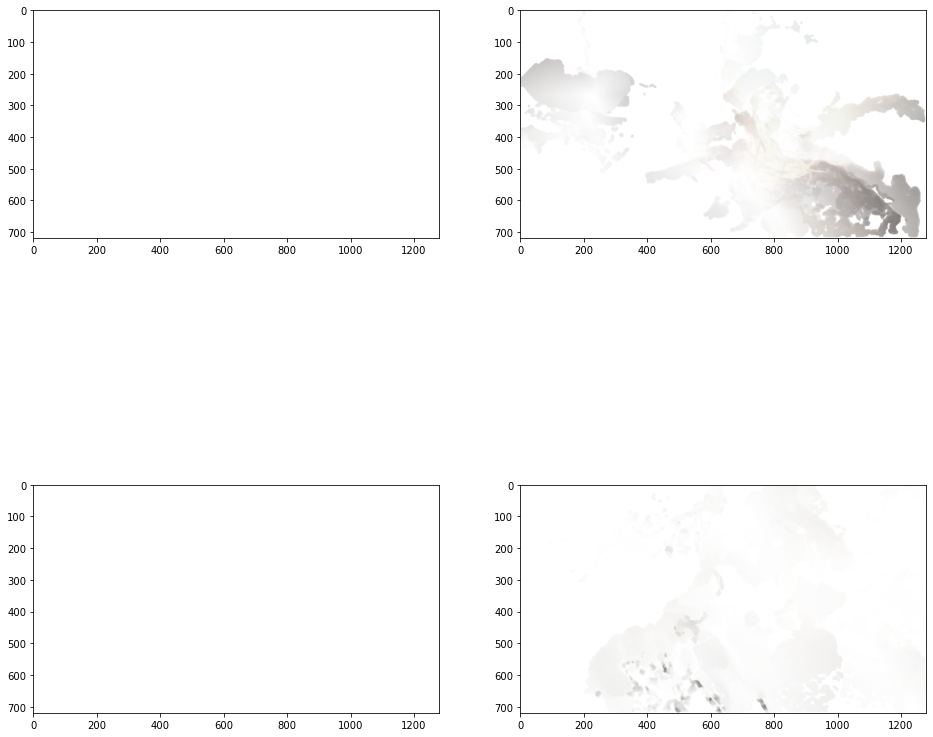

In [7]:
#Recover images from the tfrecord file.
plt.figure(figsize = (16, 16))

for image_features in parsed_video_dataset.take(1):
    image_raw = image_features.numpy() / 255.0

    #Display subplots.
    for item in range(4):
        plt.subplot(2, 2, item + 1)
        plt.imshow(image_raw[item, :, :, ])
    plt.show()

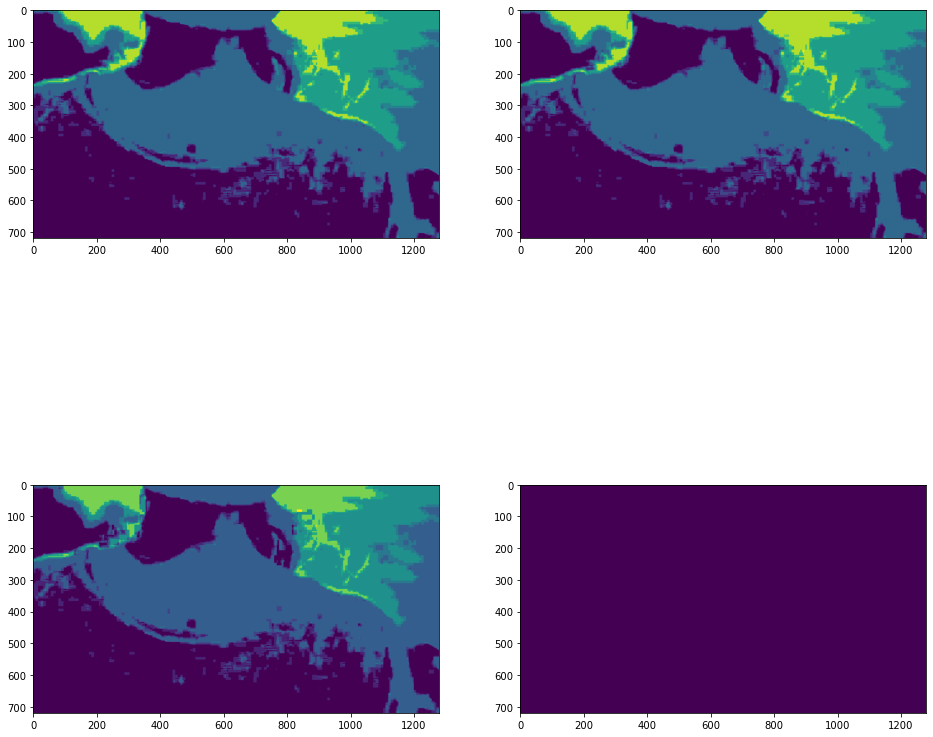

In [8]:
#Recover images from the tfrecord file.
plt.figure(figsize = (16, 16))

for image_features in parsed_video_dataset.unbatch().take(1):
    image_raw = image_features.numpy()

    #Display subplots.
    for item in range(4):
        plt.subplot(2, 2, item + 1)
        plt.imshow(image_raw[:, :, item])
    plt.show()